# Malware Related Activity Prediction Pipeline

#### Imports and Data Load

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
connections = pd.read_csv("data/connections.csv", delimiter='\t')
devices = pd.read_csv("data/devices.csv", delimiter='\t')
processes = pd.read_csv("data/processes.csv", delimiter='\t')
profiles = pd.read_csv("data/profiles.csv", delimiter='\t')

## 1 Phase I

### 1.1 Basic Data Description and Characteristics

#### 1.1.1 Data Structure Analysis

##### Connections

In [14]:
print(f"Data information:")
connections.info()
print(f"\n\nData description:\n{connections.describe()}\n")
print(f"\nData structure:")
connections.head()

Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15160 entries, 0 to 15159
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ts                 15160 non-null  object 
 1   imei               15160 non-null  int64  
 2   mwra               15160 non-null  float64
 3   c.android.youtube  15160 non-null  float64
 4   c.katana           15160 non-null  float64
 5   c.android.gm       15160 non-null  float64
 6   c.android.chrome   15160 non-null  float64
 7   c.dogalize         15160 non-null  float64
 8   c.updateassist     15160 non-null  float64
 9   c.android.vending  15160 non-null  float64
 10  c.UCMobile.x86     15160 non-null  float64
 11  c.UCMobile.intl    15160 non-null  float64
 12  c.raider           15160 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.5+ MB


Data description:
               imei          mwra  c.android.youtube      c.katana  \


ts                 imei  mwra  c.android.youtube  \
0  2018-05-05 10:00:00  8630330696303481495   1.0           12.26513   
1  2018-05-05 10:01:00   359043379931766510   0.0           10.99262   
2  2018-05-05 10:02:00  8630330696303481107   1.0           15.36004   
3  2018-05-05 10:03:00   863033069630348180   0.0            9.85083   
4  2018-05-05 10:04:00  8630330696303482360   0.0           14.09594   

   c.katana  c.android.gm  c.android.chrome  c.dogalize  c.updateassist  \
0   9.00831       9.49543          11.28728    10.38606        37.47582   
1   9.58422      13.94219          13.57270    14.60374        26.04814   
2  10.17672      11.29302          13.42295    11.46890        62.91819   
3  10.50735      11.33704           9.01125    12.00125        44.88155   
4  11.07454       9.21168           8.94069    12.61083        61.19159   

   c.android.vending  c.UCMobile.x86  c.UCMobile.intl  c.raider  
0           63.36036        41.38373         83.30335  74.60602  
1           10.12276        39.58289          2.53433  69.83137  
2           43.93041        65.39351         66.58459  11.94376  
3           67.47714        33.18430         40.30341  37.94169  
4           64.32489        32.20124         63.26817  99.50581

##### Devices

In [19]:
print(f"Data information:")
devices.info()
print(f"\n\nData description:\n{devices.describe()}\n")
print(f"\nData structure:")
devices.head()

Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2980 entries, 0 to 2979
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    2980 non-null   float64
 1   longitude   2980 non-null   float64
 2   store_name  2980 non-null   object 
 3   code        2977 non-null   object 
 4   location    2980 non-null   object 
 5   imei        2980 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 139.8+ KB


Data description:
          latitude    longitude          imei
count  2980.000000  2980.000000  2.980000e+03
mean     29.645738     9.205031  3.904118e+18
std      22.757447    72.666185  3.327017e+18
min     -54.800000  -156.474320  3.590434e+17
25%      15.736280   -61.878990  8.630331e+17
50%      36.614935     9.346615  3.590434e+18
75%      45.783975    66.409922  8.630331e+18
max      68.798330   178.004170  8.630331e+18


Data structure:


latitude  longitude store_name code       location                 imei
0  46.08333  122.08333    Ulanhot   CN  Asia/Shanghai  8630330696303481735
1  16.68911   98.50893    Myawadi   MM    Asia/Yangon  8630330696303481164
2  38.96667   -0.18333     Gandia   ES  Europe/Madrid  8630330696303481057
3  48.52961   12.16179   Landshut   DE  Europe/Berlin   359043379931766353
4  56.85836   35.90057       Tver   RU  Europe/Moscow  3590433799317661941

##### Processes

In [16]:
print(f"Data information:")
processes.info()
print(f"\n\nData description:\n{processes.describe()}\n")
print(f"\nData structure:")
processes.head()

Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15160 entries, 0 to 15159
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ts                          15160 non-null  object 
 1   imei                        15160 non-null  int64  
 2   mwra                        15160 non-null  float64
 3   p.android.gm                15160 non-null  float64
 4   p.android.externalstorage   15160 non-null  float64
 5   p.android.chrome            15160 non-null  float64
 6   p.system                    15160 non-null  float64
 7   p.android.settings          15160 non-null  float64
 8   p.android.packageinstaller  15160 non-null  float64
 9   p.android.documentsui       15160 non-null  float64
 10  p.google                    15160 non-null  float64
 11  p.notifier                  15160 non-null  float64
 12  p.olauncher                 15160 non-null  float64
 13  p.android.def

ts                 imei  mwra  p.android.gm  \
0  2018-05-05 10:00:00  8630330696303481495   1.0       8.86395   
1  2018-05-05 10:01:00   359043379931766510   0.0       9.91497   
2  2018-05-05 10:02:00  8630330696303481107   1.0       8.85825   
3  2018-05-05 10:03:00   863033069630348180   0.0       9.10183   
4  2018-05-05 10:04:00  8630330696303482360   0.0       9.46824   

   p.android.externalstorage  p.android.chrome  p.system  p.android.settings  \
0                   13.02477          10.86750   7.49424            15.51358   
1                   14.95342           8.75484  11.12868            12.84456   
2                   12.41158           6.81129   6.27154            14.63611   
3                   14.59227           8.36162  13.74939            12.17126   
4                   12.61537          14.89910   7.73386            12.17794   

   p.android.packageinstaller  p.android.documentsui  ...  \
0                     9.41107               15.39190  ...   
1                     9.83628               14.32174  ...   
2                    11.36688               11.93349  ...   
3                    11.66347               12.27116  ...   
4                    14.30100               13.77368  ...   

   p.android.defcontainer  p.android.vending  p.process.gapps  p.simulator  \
0                44.94347           99.03688         54.05561     47.74283   
1                30.23815           24.04779         83.70527     10.86666   
2                52.19960            2.33330          6.62872     51.04675   
3                68.17462           25.85253         10.93414     37.06926   
4                54.84178            6.55989         70.29777     76.34902   

   p.dogalize  p.android.gms  p.browser.provider  p.gms.persistent  p.katana  \
0    62.14289       28.71385            32.05187          86.35658  79.93212   
1    82.33455       76.61692            32.05482          98.16903   7.14569   
2    28.04786       29.14320            50.56621          84.50028  57.20779   
3    47.92182       34.65300            14.38753          44.09099  41.96218   
4    39.33797        7.34483            27.86712          95.83795  55.63924   

   p.inputmethod.latin  
0             65.50034  
1             53.82484  
2             58.70091  
3             75.97173  
4             66.55716  

[5 rows x 23 columns]

##### Profiles

In [17]:
print(f"Data information:")
profiles.info()
print(f"\n\nData description:\n{profiles.describe()}\n")
print(f"\nData structure:")
profiles.head()

Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   residence         882 non-null    object
 1   job               756 non-null    object
 2   birthdate         1386 non-null   object
 3   current_location  2394 non-null   object
 4   imei              2520 non-null   int64 
 5   ssn               2520 non-null   object
 6   company           2520 non-null   object
 7   registration      2520 non-null   object
 8   name              2520 non-null   object
 9   username          2520 non-null   object
 10  user_id           2520 non-null   int64 
 11  mail              2520 non-null   object
dtypes: int64(2), object(10)
memory usage: 236.4+ KB


Data description:
               imei      user_id
count  2.520000e+03  2520.000000
mean   3.949785e+18  1260.018254
std    3.340028e+18   733.407620
min    3.590434e+17     0.

residence  job   birthdate  \
0  024 Austin Throughway Apt. 956\r\nLake Elizabe...  NaN         NaN   
1                                                NaN  NaN  1986-04-01   
2         219 Sarah Causeway\r\nSandraland, NV 51026  NaN         NaN   
3                                                NaN  NaN         NaN   
4  55553 Jennifer Hollow Suite 158\r\nLake Crysta...  NaN         NaN   

                                  current_location                 imei  \
0   (Decimal('-37.3871205'), Decimal('63.057817'))  8630330696303481297   
1    (Decimal('-9.8577275'), Decimal('10.693479'))   863033069630348487   
2  (Decimal('-69.389991'), Decimal('-154.055961'))  8630330696303482485   
3    (Decimal('86.206030'), Decimal('-46.129473'))   359043379931766320   
4    (Decimal('15.107049'), Decimal('150.404188'))  3590433799317661461   

           ssn                 company          registration  \
0  045-68-8610          Fuentes-Wilson  05/24/2018, 00:00:00   
1  655-75-2092               Gomez Ltd            2018/12/10   
2  047-42-5809       Robinson and Sons           13 Mar 2024   
3  611-26-7229  Bowman, White and Diaz            2022-09-09   
4  313-91-3441           Coleman-Riley            2023/10/22   

               name       username  user_id                        mail  
0  Elizabeth Brooks  oconnorsandra      698           ajoseph@yahoo.com  
1    Spencer Brooks        lwright       15      michaelyates@yahoo.com  
2    Monica Mendoza     seangarner     2339  joneschristina@hotmail.com  
3   James Hurley MD  anthonytucker      777     angelavaughan@gmail.com  
4   Anthony Sherman     warnersean     1966    mcgeealexander@gmail.com

#### 1.1.2 Individual Attribute Analysis

##### Constructing a correlation matrix
- To understand the correlation between pairs of variables
    - +1 -> strong **positive** relation between two variables
    - -1 -> strong **negative** relation between two variables
    - 0 -> absence of any relation between two variables
- Since datasets _profiles.csv_ and _devices.csv_ are logicaly not related to "_mwra_" attribute prediction, we will skip them here
- The results indicate relations to malware-related activities prediction
    - We'll pick 5 of the most related attributes to this matter from each dataset

##### Correlation matrix for _connections.csv_

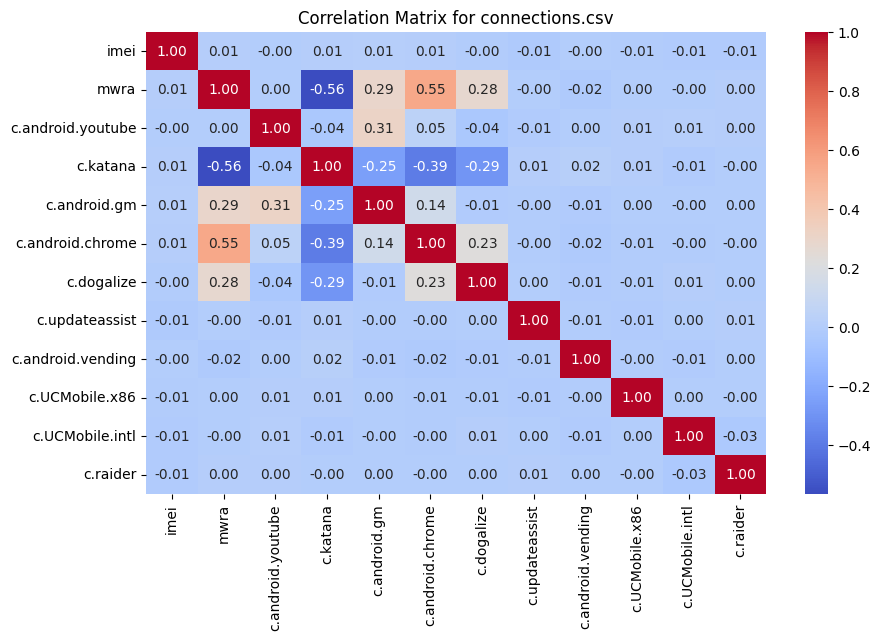

In [6]:
# Numeric columns only
numeric_cols_connections = connections.select_dtypes(include=['float64', 'int64'])

corr_connections = numeric_cols_connections.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_connections, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for connections.csv')
plt.show()

In [25]:
# Picking the 5 attributes with the strongest relation with "mwra"
correlation_with_mwra = corr_connections['mwra'].abs()
sorted_attributes = correlation_with_mwra.sort_values(ascending=False)
important_attributes = sorted_attributes.index[:6].tolist()
print(important_attributes)

['mwra', 'c.katana', 'c.android.chrome', 'c.android.gm', 'c.dogalize', 'c.android.vending']


##### Correlation matrix for _processes.csv_

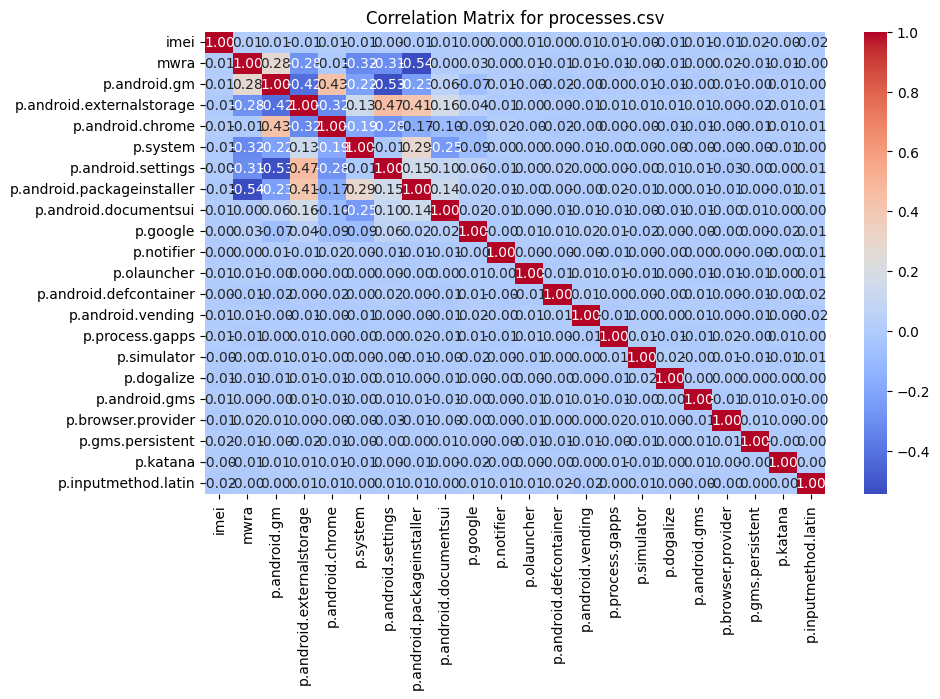

In [11]:
# Numeric columns only
numeric_cols_processes = processes.select_dtypes(include=['float64', 'int64'])

corr_processes = numeric_cols_processes.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_processes, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for processes.csv')
plt.show()

In [26]:
# Picking the 5 attributes with the strongest relation with "mwra"
correlation_with_mwra = corr_processes['mwra'].abs()
sorted_attributes = correlation_with_mwra.sort_values(ascending=False)
important_attributes.extend(sorted_attributes.index[:6].tolist())
print(important_attributes)

['mwra', 'c.katana', 'c.android.chrome', 'c.android.gm', 'c.dogalize', 'c.android.vending', 'mwra', 'p.android.packageinstaller', 'p.system', 'p.android.settings', 'p.android.gm', 'p.android.externalstorage']


##### Attribute descriptions

In [33]:
for i, attr in enumerate(important_attributes):
    if i < 6:
        print(f"{attr} (connections):\n{connections[attr].describe()}\n")
    else:
        print(f"{attr} (processes):\n{processes[attr].describe()}\n")

mwra (connections):
count    15160.000000
mean         0.626715
std          0.483693
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: mwra, dtype: float64

c.katana (connections):
count    15160.000000
mean        10.479324
std          2.575287
min          1.563850
25%          8.594650
50%         10.461030
75%         12.429803
max         19.729040
Name: c.katana, dtype: float64

c.android.chrome (connections):
count    15160.000000
mean        11.547112
std          2.614374
min          2.338060
25%          9.647287
50%         11.574880
75%         13.436723
max         20.490790
Name: c.android.chrome, dtype: float64

c.android.gm (connections):
count    15160.000000
mean        10.370889
std          2.404230
min          3.126100
25%          8.657723
50%         10.074820
75%         11.967098
max         19.542390
Name: c.android.gm, dtype: float64

c.dogalize (connections):
count    15160.000000
mean    

##### Distributions visualization

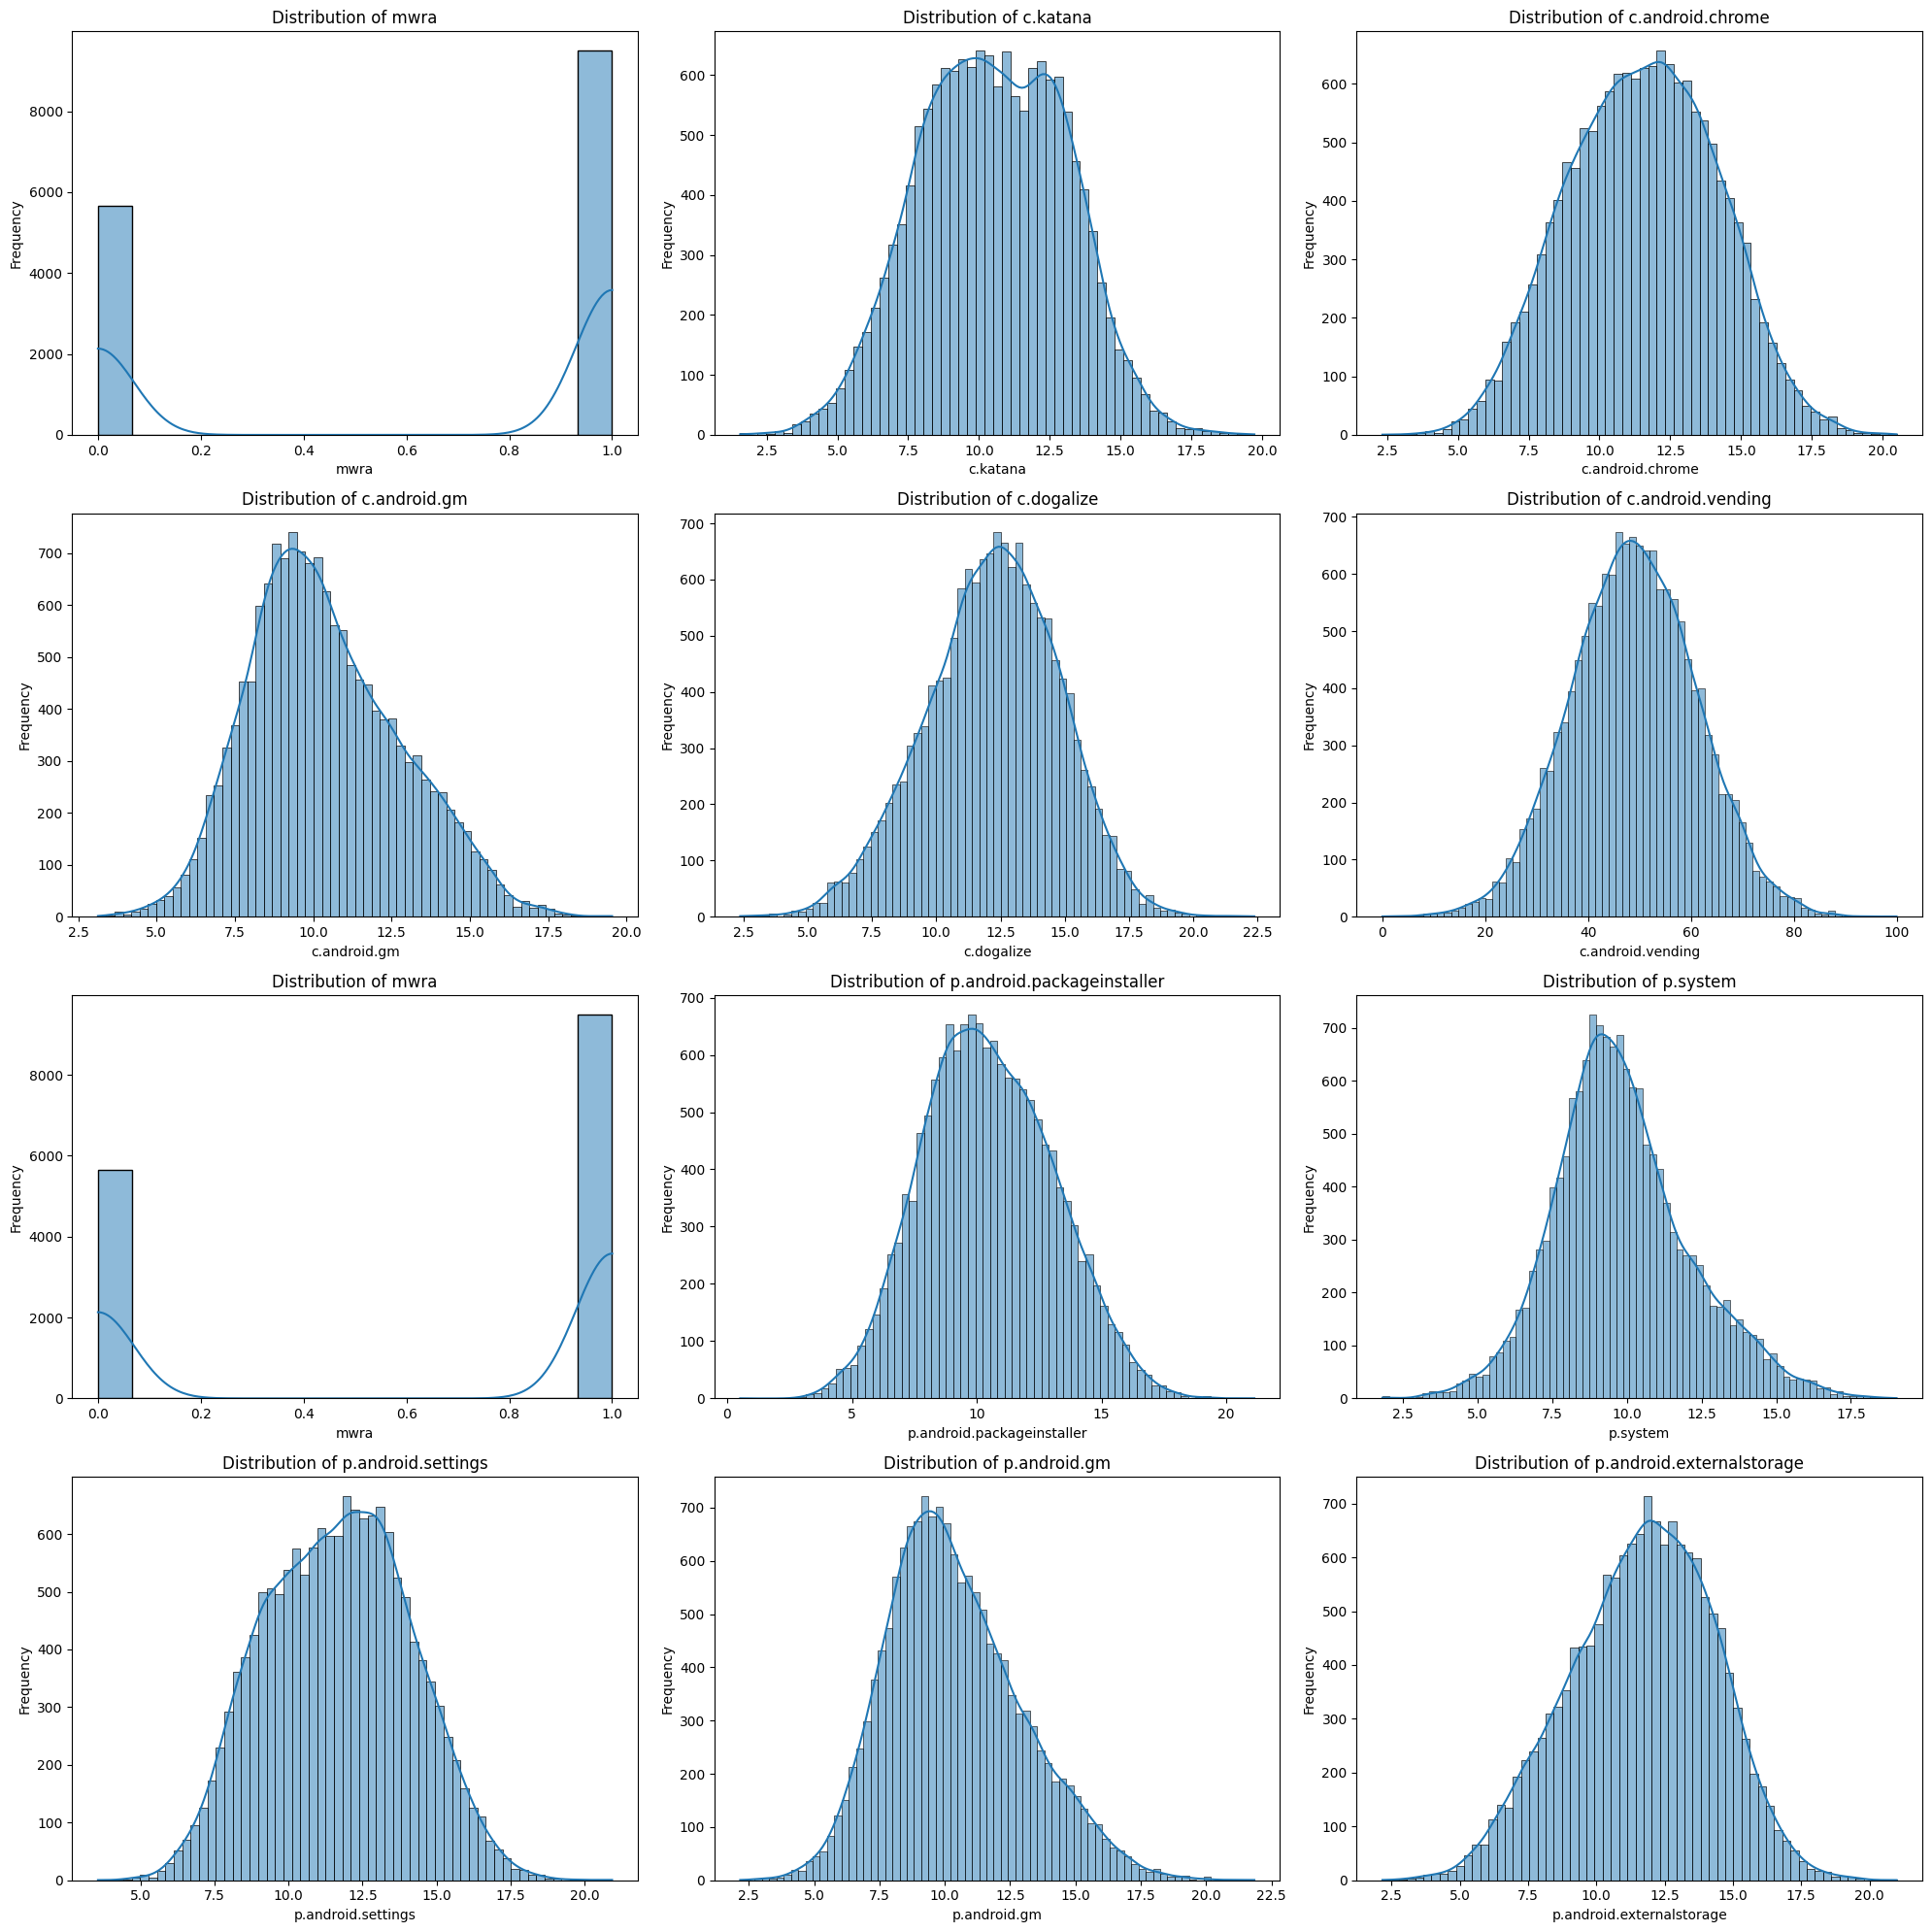

In [50]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
axes = axes.flatten()

for i, attr in enumerate(important_attributes):
    if i < 6:
        sns.histplot(connections[attr], kde=True, ax=axes[i])
    else:
        sns.histplot(processes[attr], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {attr}')
    axes[i].set_xlabel(attr)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

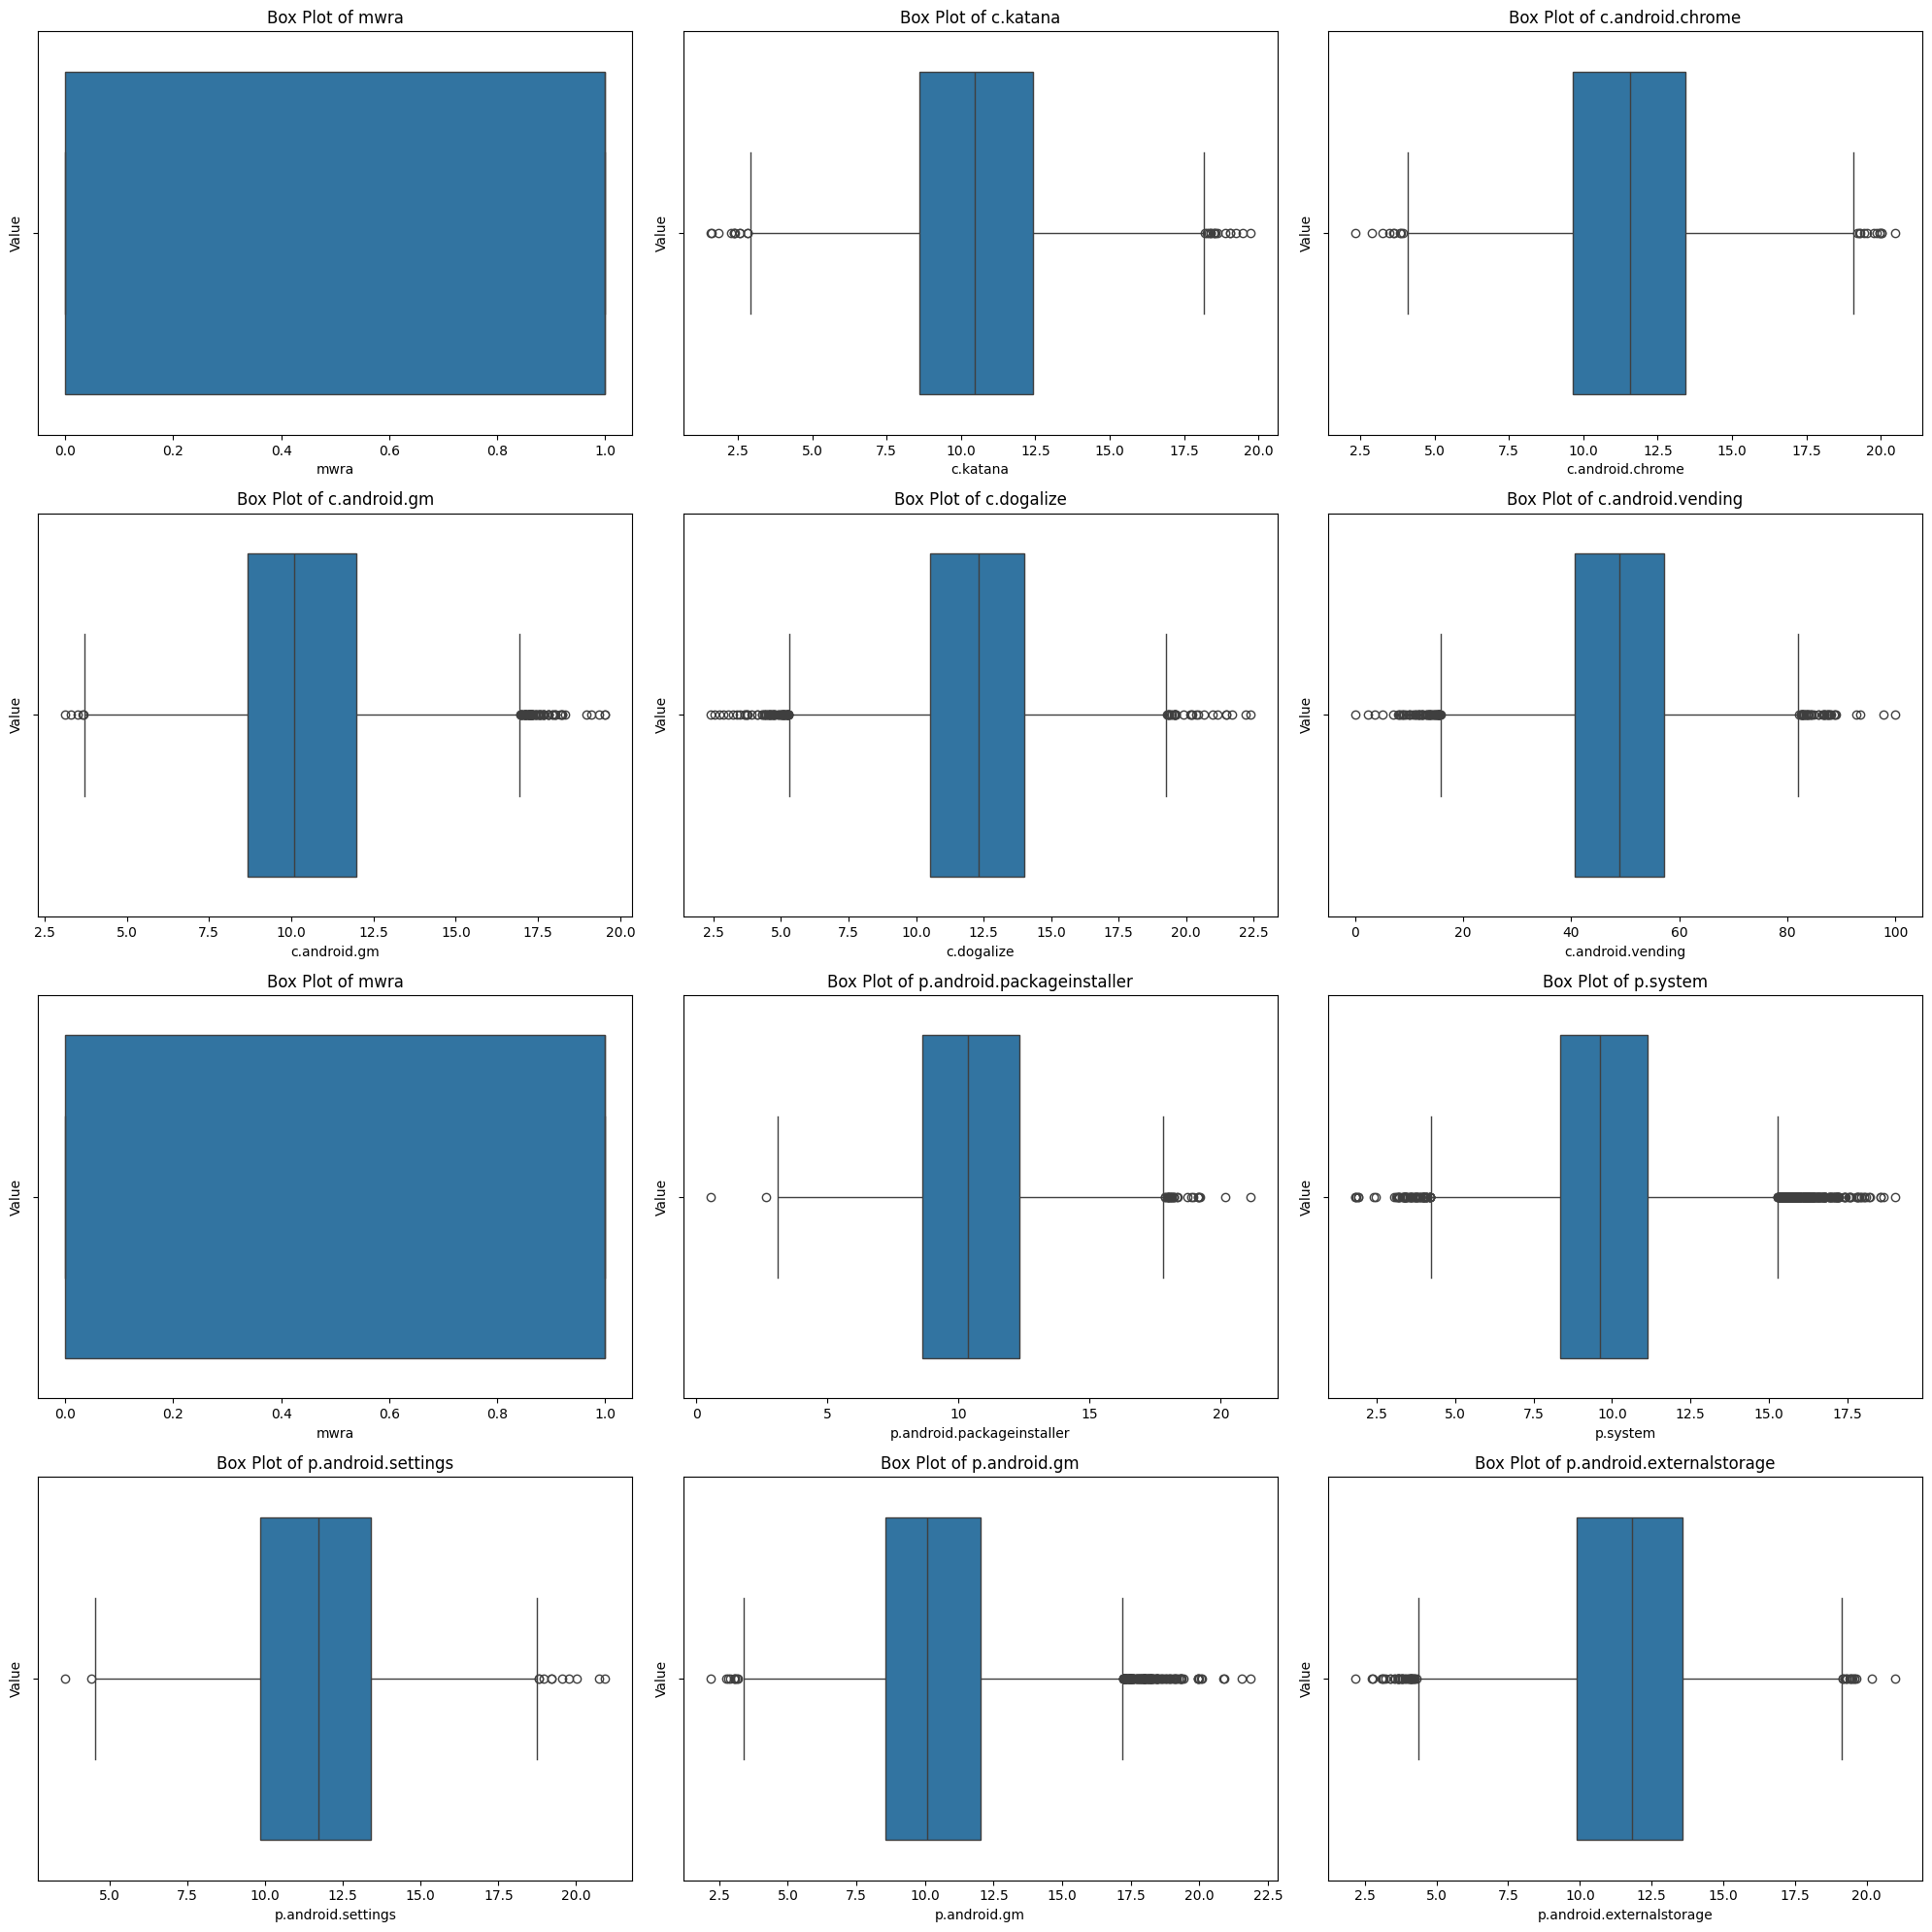

In [51]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
axes = axes.flatten()

for i, attr in enumerate(important_attributes):
    if i < 6:
        sns.boxplot(x=connections[attr], ax=axes[i])
    else:
        sns.boxplot(x=processes[attr], ax=axes[i])
    axes[i].set_title(f'Box Plot of {attr}')
    axes[i].set_xlabel(attr)
    axes[i].set_ylabel('Value')

plt.tight_layout()
plt.show()

#### 1.1.3 Paired Data Analysis - Relationships and Dependencies Between Attribute Pairs Identification

##### Connections dataset

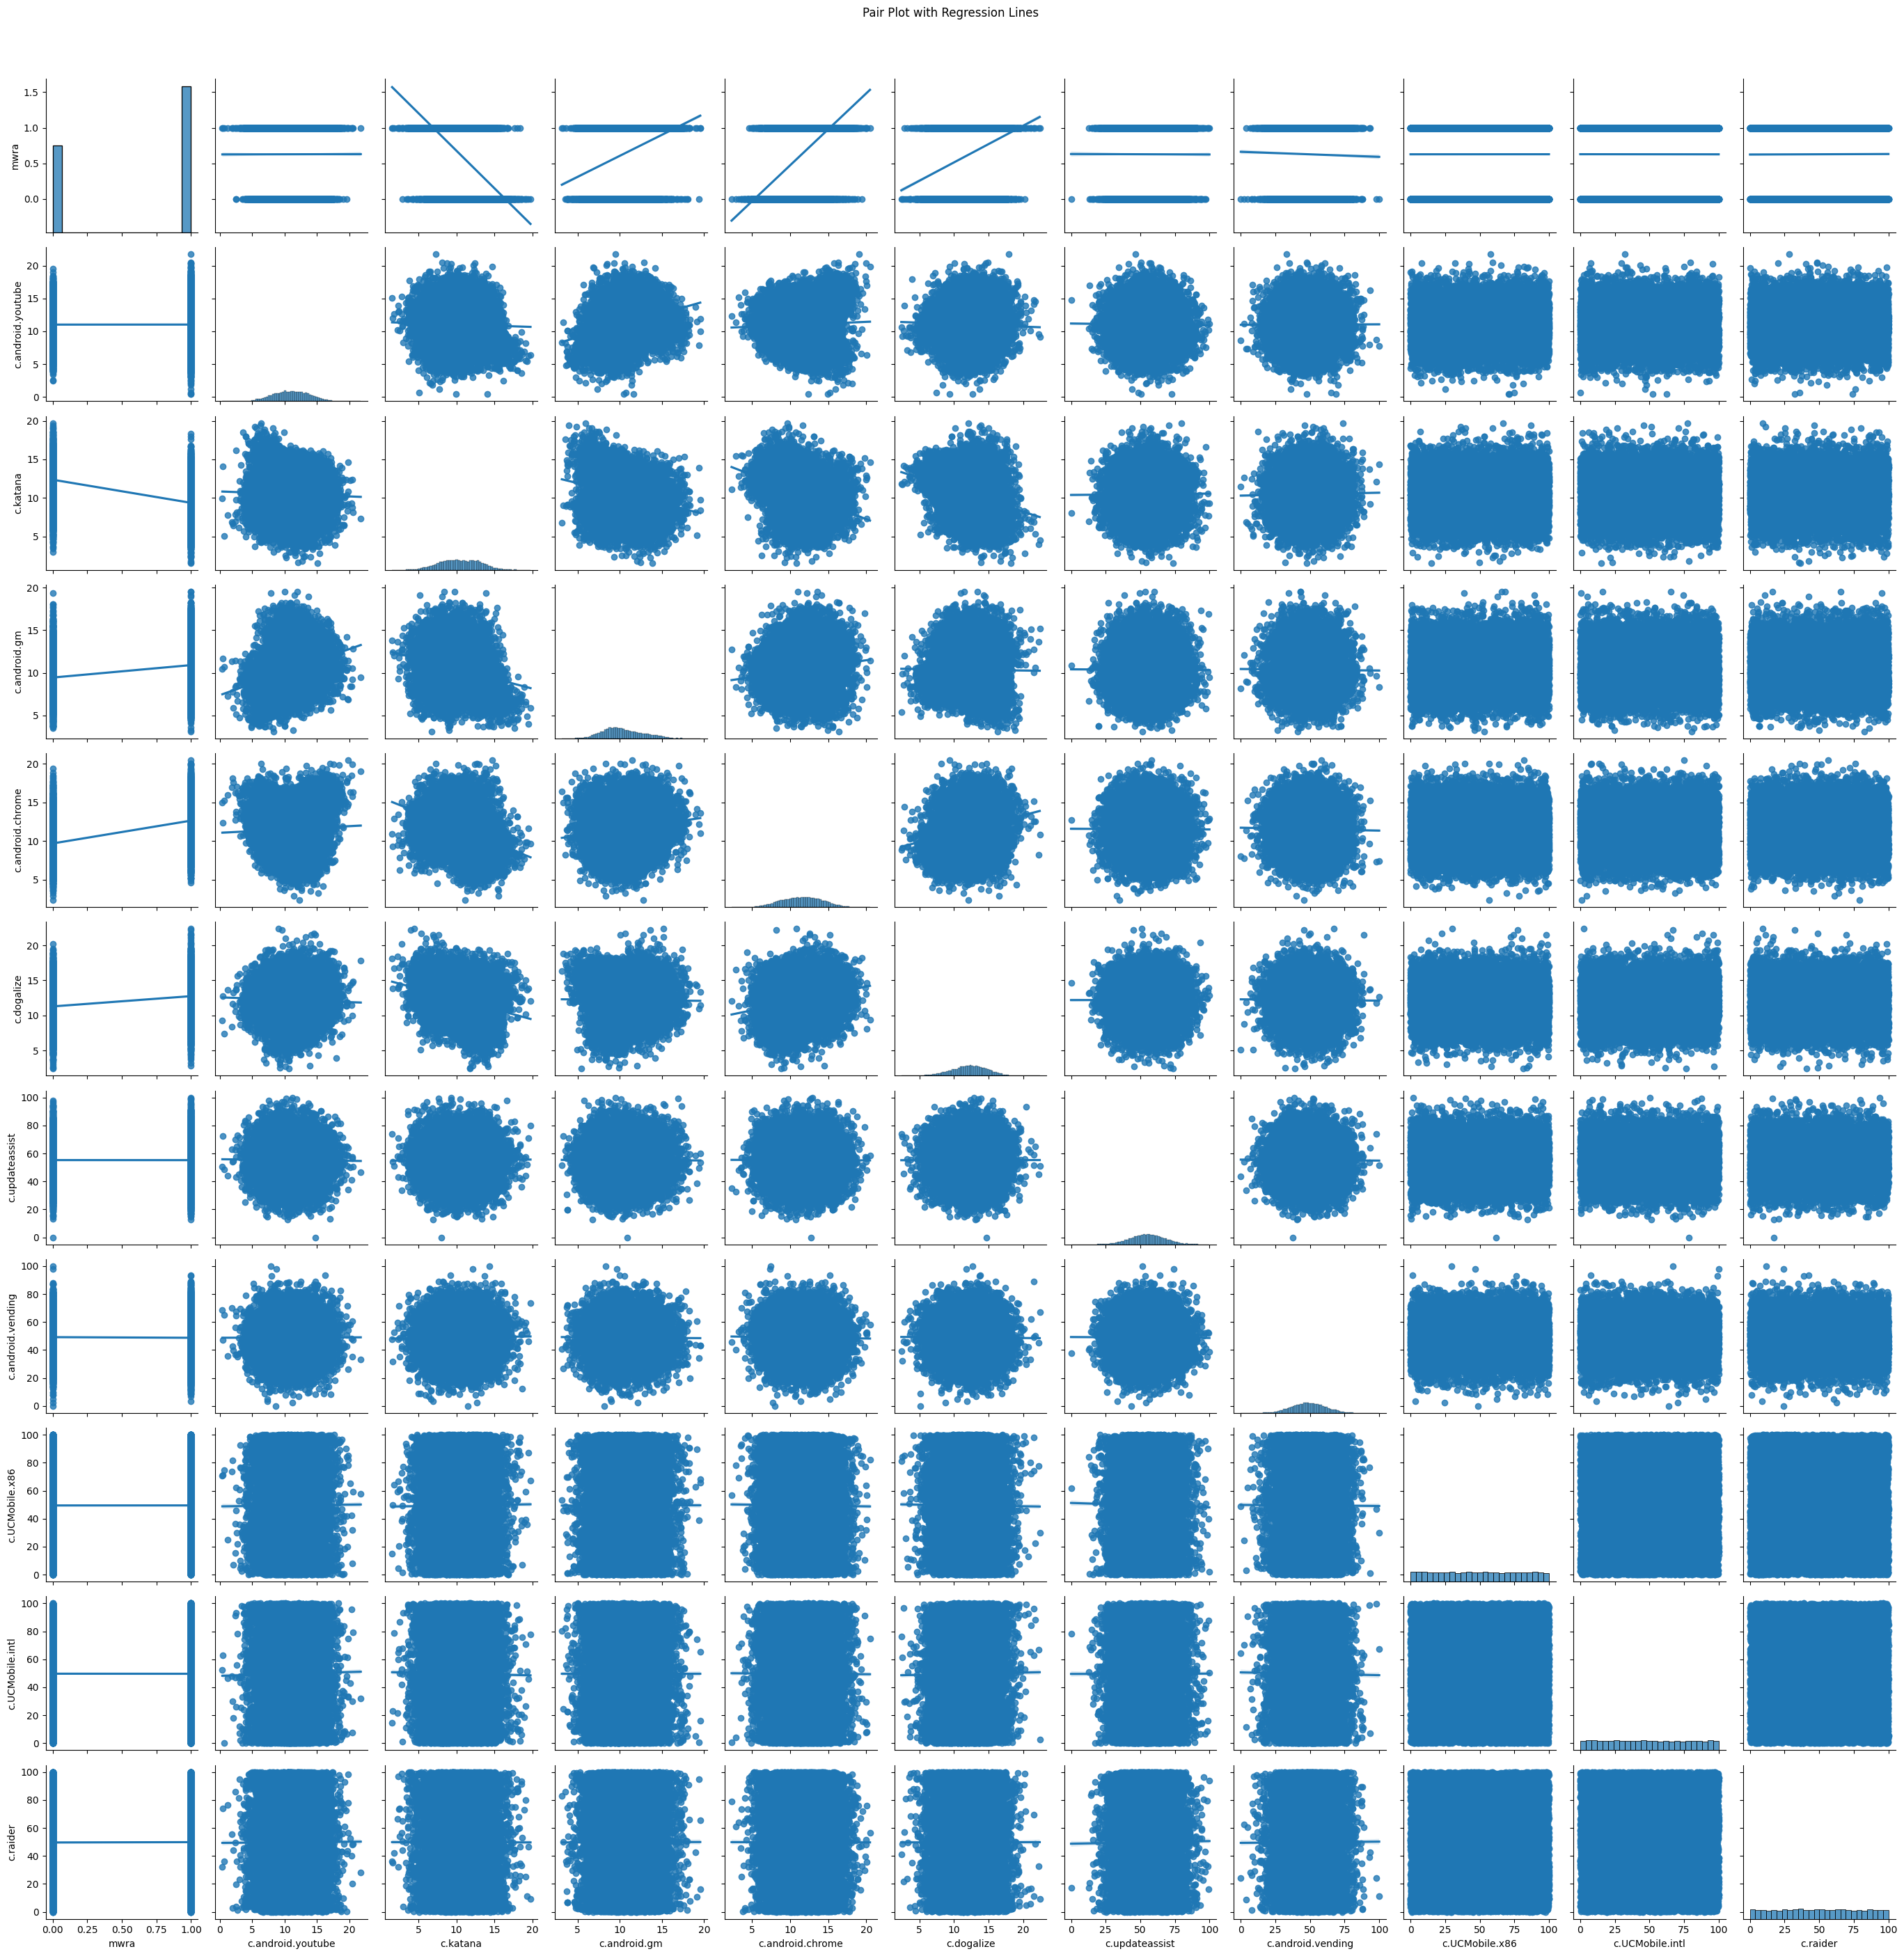

In [54]:
sns.pairplot(connections.drop(columns=['imei', 'ts']), kind='reg')
plt.suptitle('Pair Plot with Regression Lines', y=1.02)
plt.tight_layout()
plt.show()

##### Processes dataset

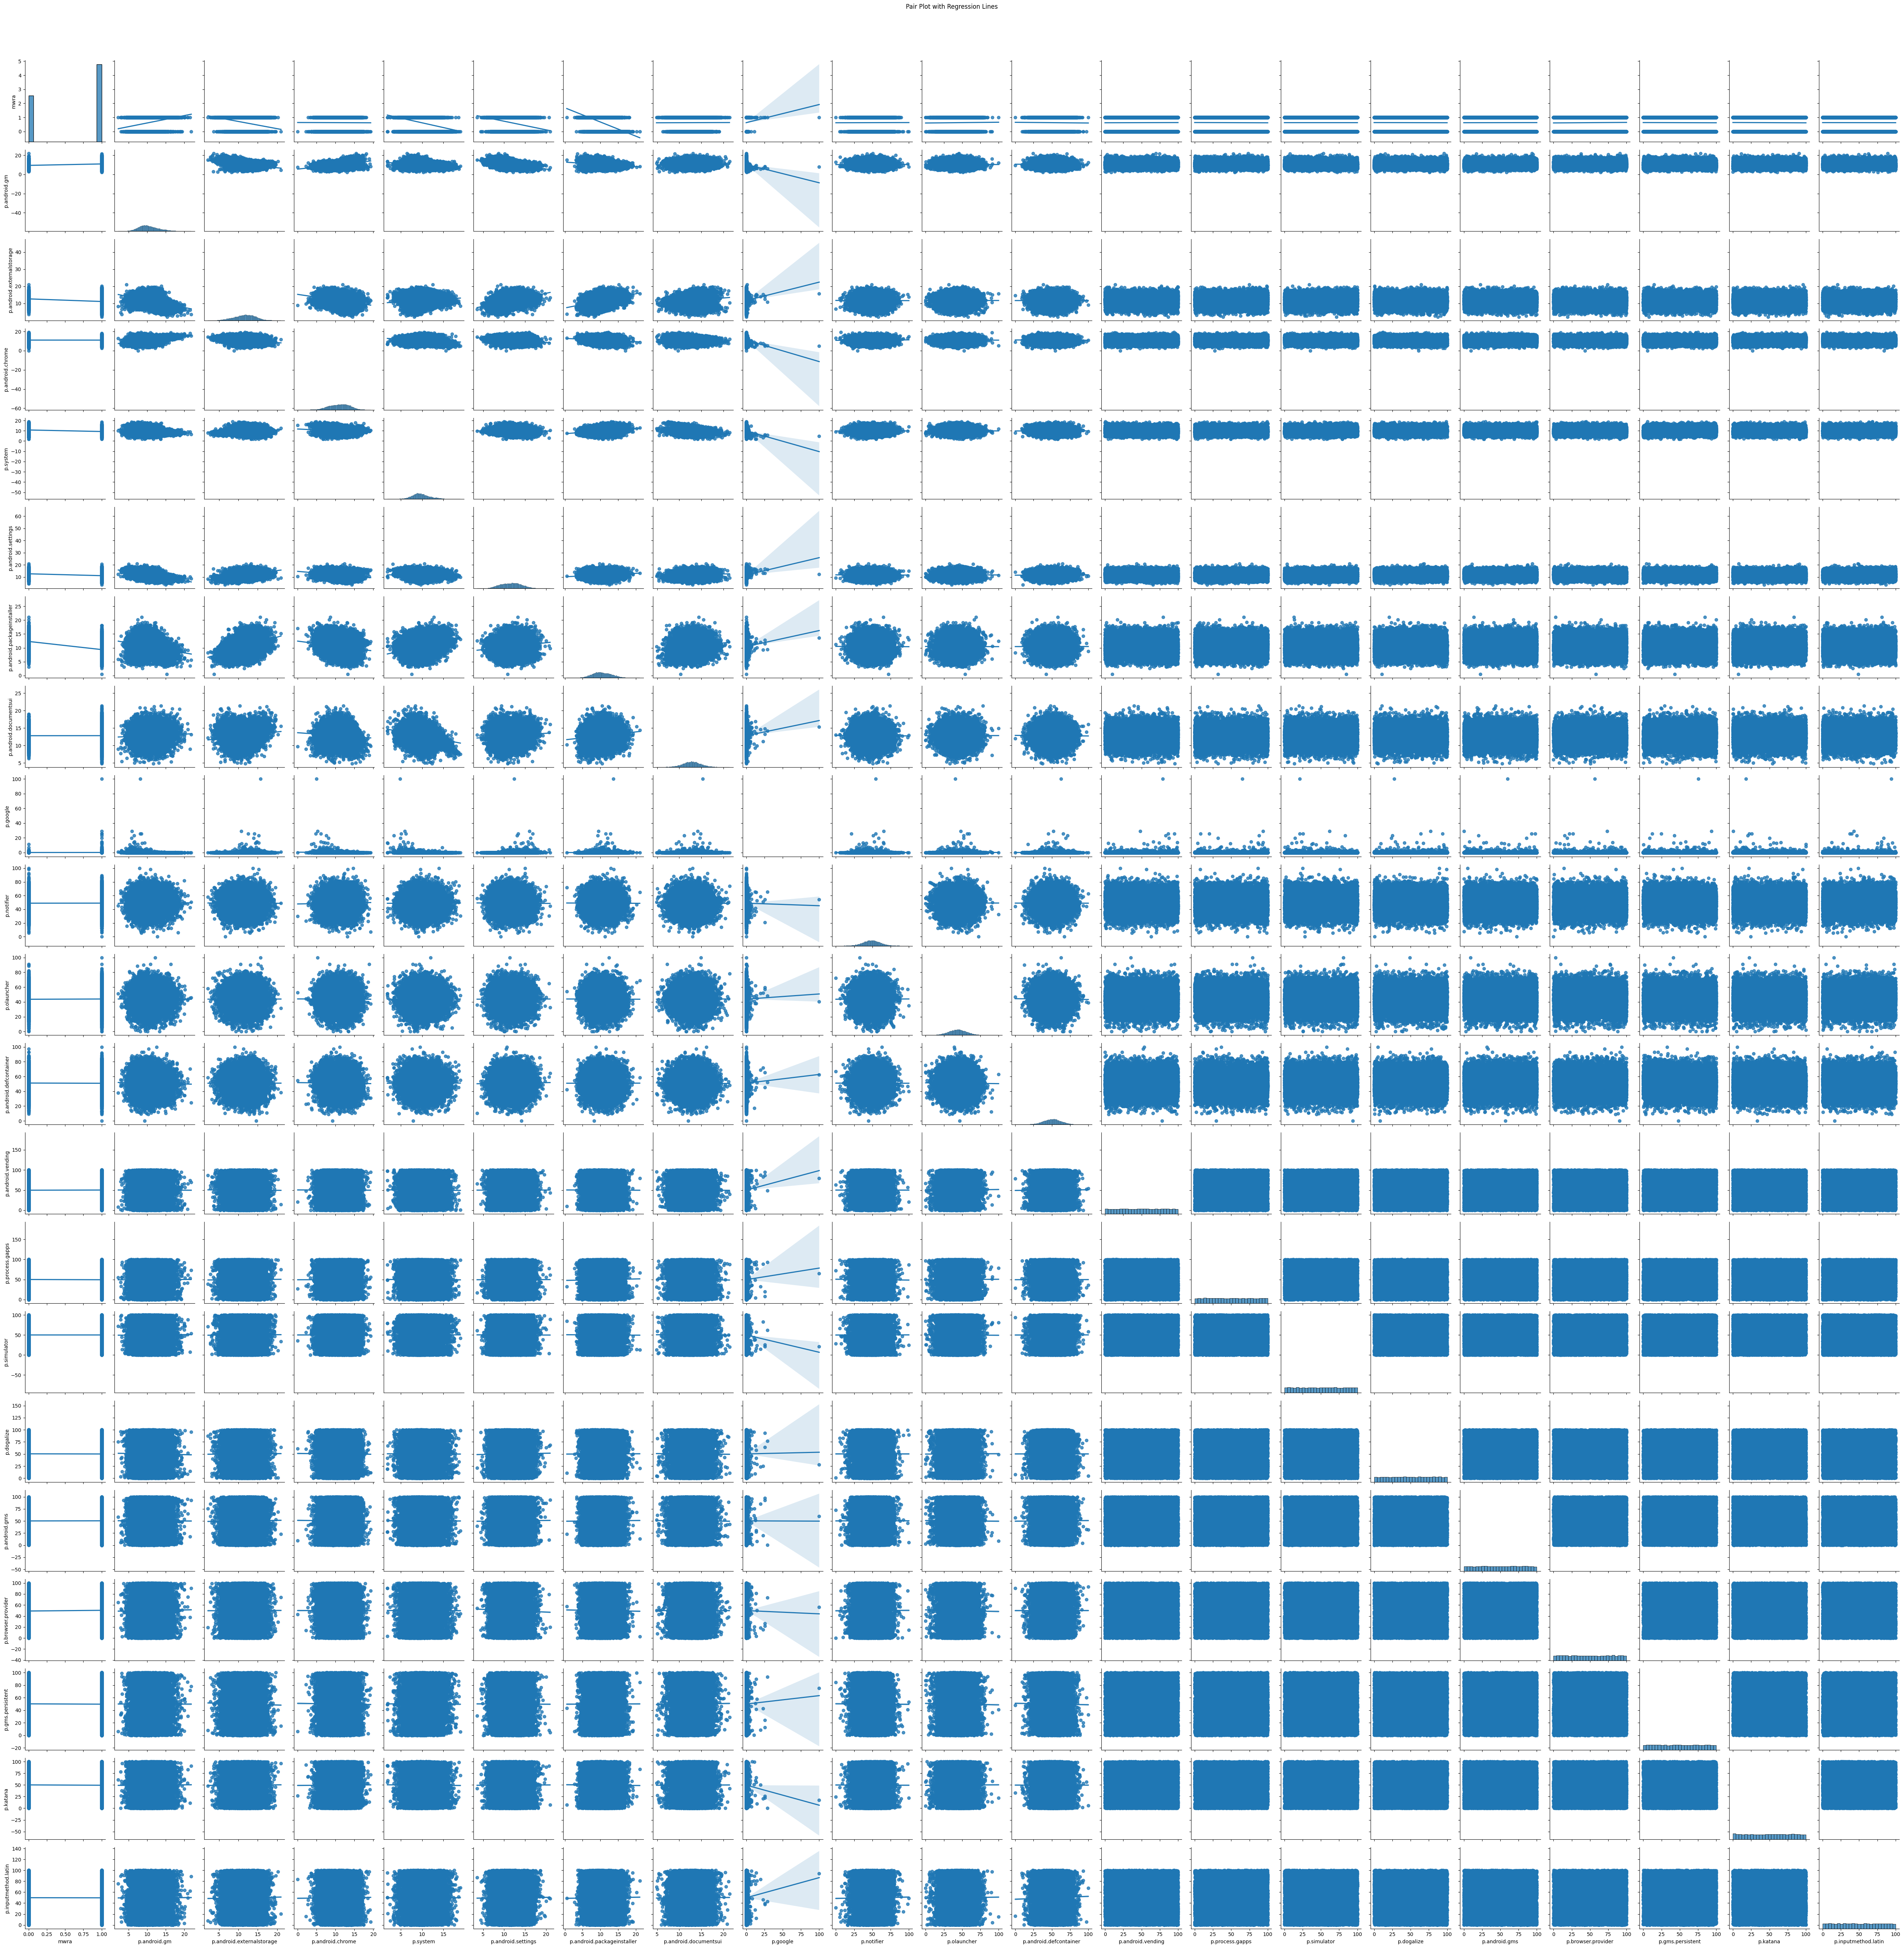

In [55]:
sns.pairplot(processes.drop(columns=['imei', 'ts']), kind='reg')
plt.suptitle('Pair Plot with Regression Lines', y=1.02)
plt.tight_layout()
plt.show()

#### 1.1.4 Paired Data Analysis - Potential Predictors

- We'll pick attribute pairs based on the **Correlation matrix** from above
    - (mwra, _most related attributes_)
- We'll use **Regression plot** and **Pair plot** separately for the visualization of relationships and dependencies between attribute pairs
    - Pair plot -> visualization of the relationship between two attributes
    - Regression plot -> containing the **regression line** (line of best fit) for representation of the predicted relationship between two attributes

##### Pair **(mwra, c.katana)**

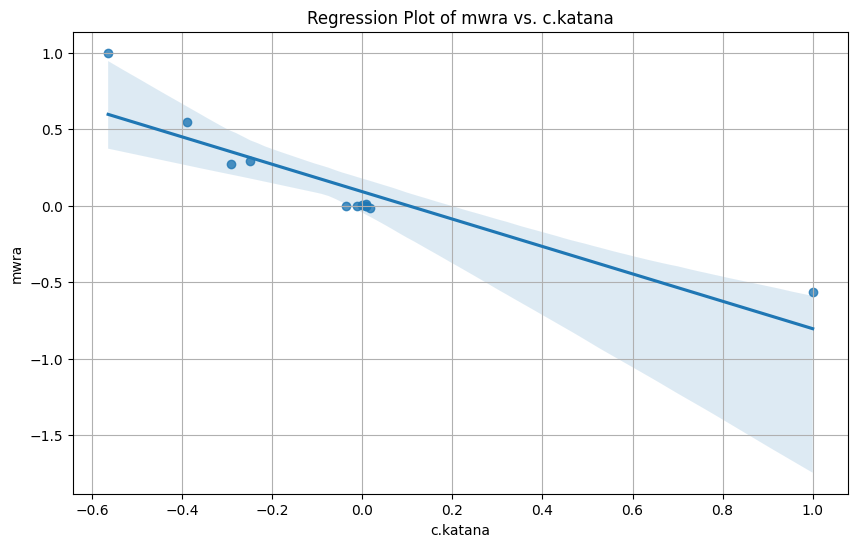

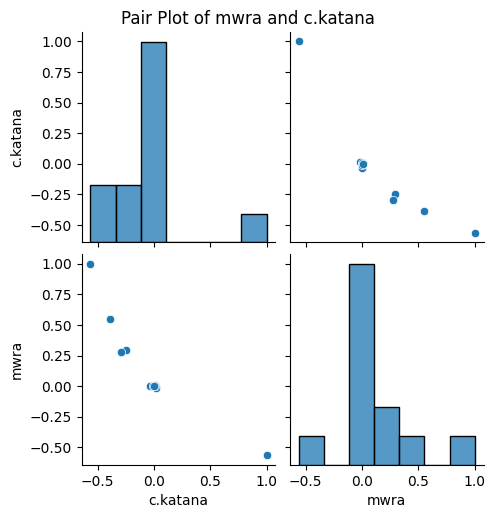

In [54]:
# Regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x="c.katana", y="mwra", data=corr_connections)
plt.title('Regression Plot of mwra vs. c.katana')
plt.xlabel('c.katana')
plt.ylabel('mwra')
plt.grid(True)
plt.show()

# Pair plot
sns.pairplot(corr_connections[['c.katana', 'mwra']])
plt.suptitle('Pair Plot of mwra and c.katana', y=1.02)
plt.show()

##### Pair **(mwra, c.android.chrome)**

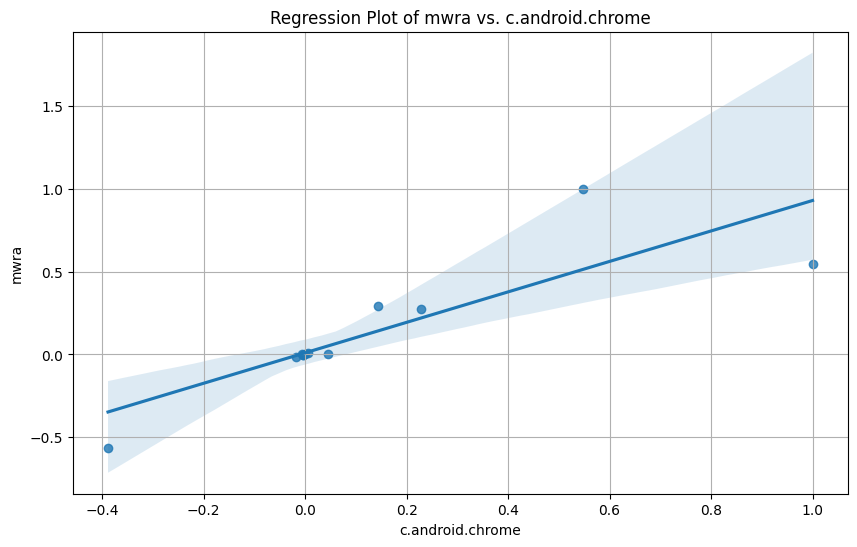

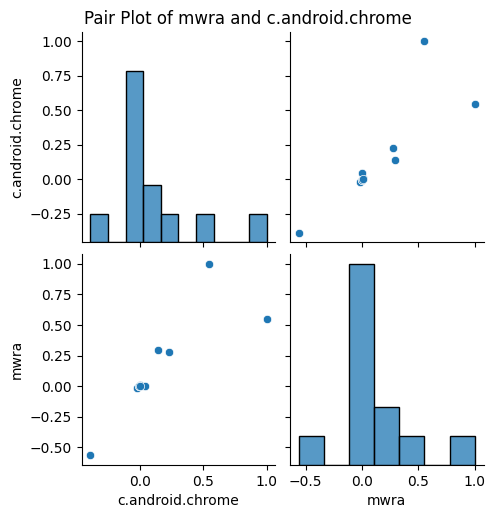

In [38]:
# Regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x="c.android.chrome", y="mwra", data=corr_connections)
plt.title('Regression Plot of mwra vs. c.android.chrome')
plt.xlabel('c.android.chrome')
plt.ylabel('mwra')
plt.grid(True)
plt.show()

# Pair plot
sns.pairplot(corr_connections[['c.android.chrome', 'mwra']])
plt.suptitle('Pair Plot of mwra and c.android.chrome', y=1.02)
plt.show()

##### Pair **(mwra, c.android.gm)**

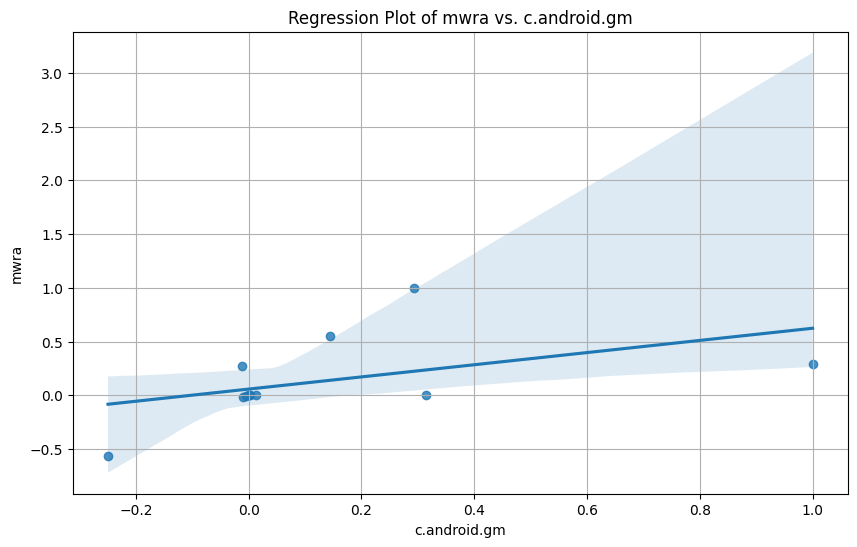

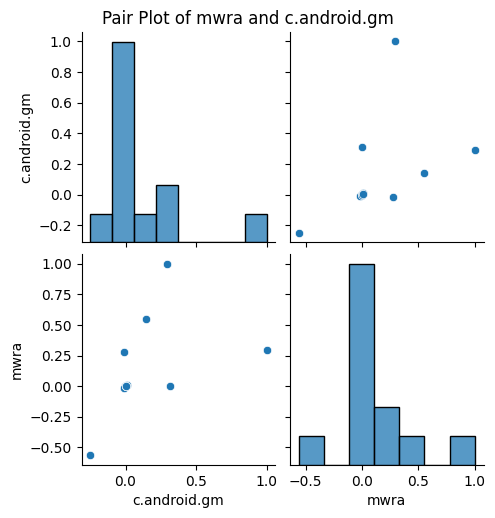

In [39]:
# Regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x="c.android.gm", y="mwra", data=corr_connections)
plt.title('Regression Plot of mwra vs. c.android.gm')
plt.xlabel('c.android.gm')
plt.ylabel('mwra')
plt.grid(True)
plt.show()

# Pair plot
sns.pairplot(corr_connections[['c.android.gm', 'mwra']])
plt.suptitle('Pair Plot of mwra and c.android.gm', y=1.02)
plt.show()

##### Pair **(mwra, c.dogalize)**

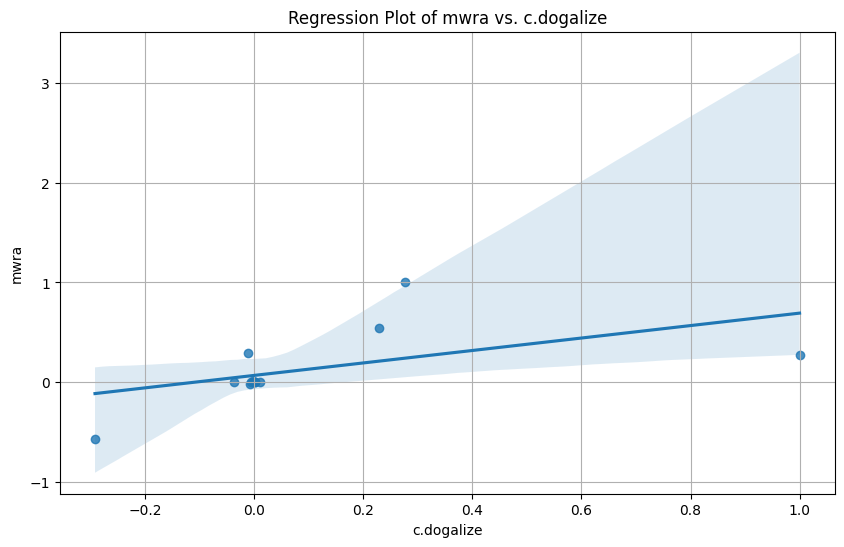

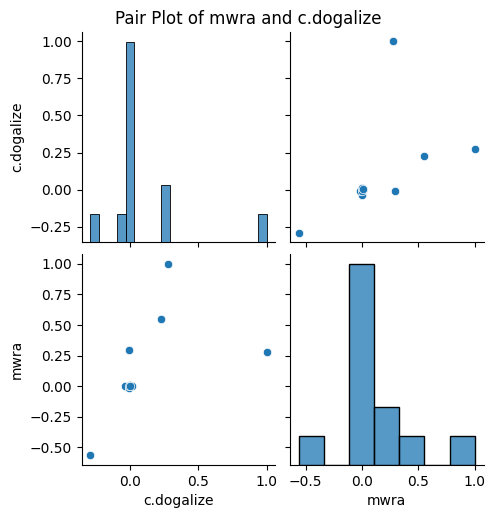

In [41]:
# Regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x="c.dogalize", y="mwra", data=corr_connections)
plt.title('Regression Plot of mwra vs. c.dogalize')
plt.xlabel('c.dogalize')
plt.ylabel('mwra')
plt.grid(True)
plt.show()

# Pair plot
sns.pairplot(corr_connections[['c.dogalize', 'mwra']])
plt.suptitle('Pair Plot of mwra and c.dogalize', y=1.02)
plt.show()

##### Pair **(mwra, c.android.vending)**

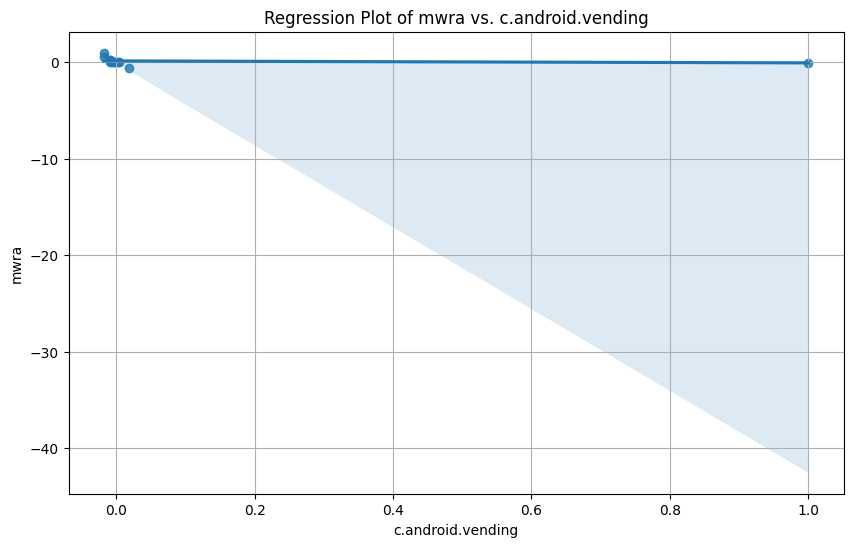

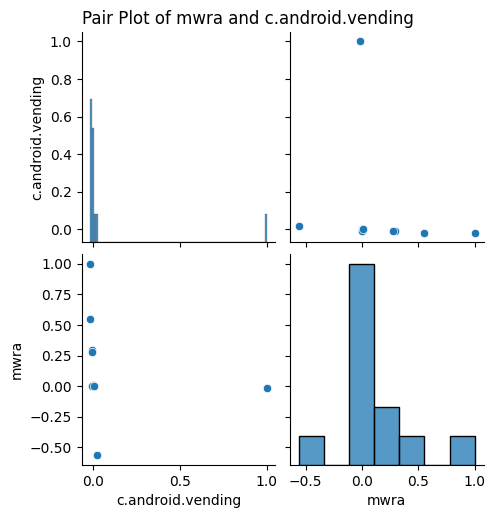

In [42]:
# Regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x="c.android.vending", y="mwra", data=corr_connections)
plt.title('Regression Plot of mwra vs. c.android.vending')
plt.xlabel('c.android.vending')
plt.ylabel('mwra')
plt.grid(True)
plt.show()

# Pair plot
sns.pairplot(corr_connections[['c.android.vending', 'mwra']])
plt.suptitle('Pair Plot of mwra and c.android.vending', y=1.02)
plt.show()

##### Pair **(mwra, p.android.packageinstaller)**

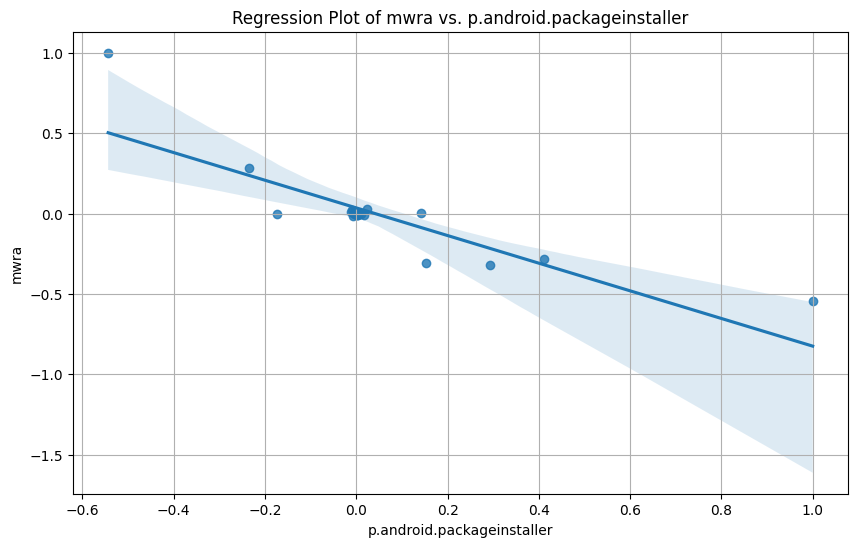

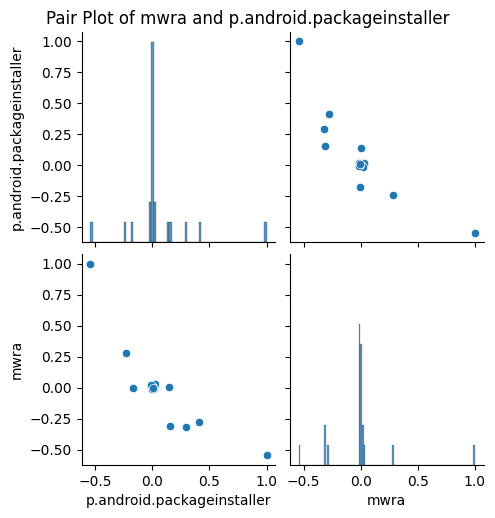

In [43]:
# Regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x="p.android.packageinstaller", y="mwra", data=corr_processes)
plt.title('Regression Plot of mwra vs. p.android.packageinstaller')
plt.xlabel('p.android.packageinstaller')
plt.ylabel('mwra')
plt.grid(True)
plt.show()

# Pair plot
sns.pairplot(corr_processes[['p.android.packageinstaller', 'mwra']])
plt.suptitle('Pair Plot of mwra and p.android.packageinstaller', y=1.02)
plt.show()

##### Pair **(mwra, p.system.)**

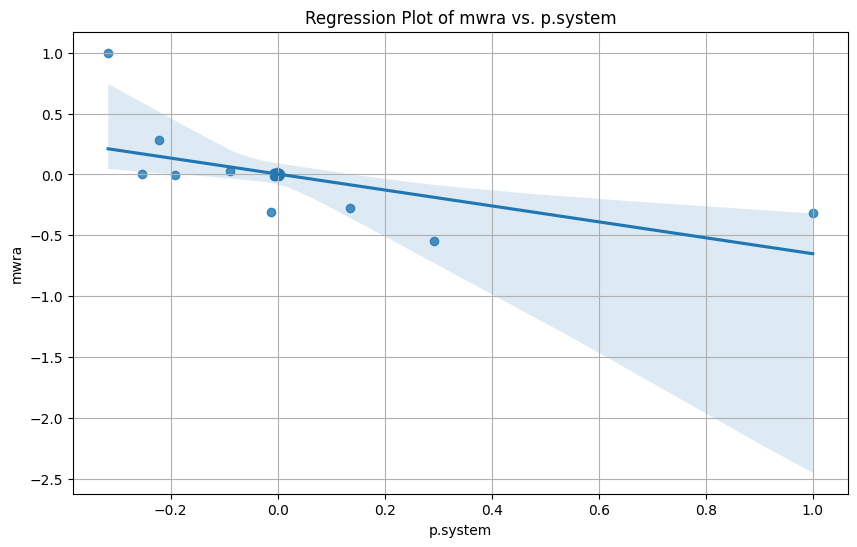

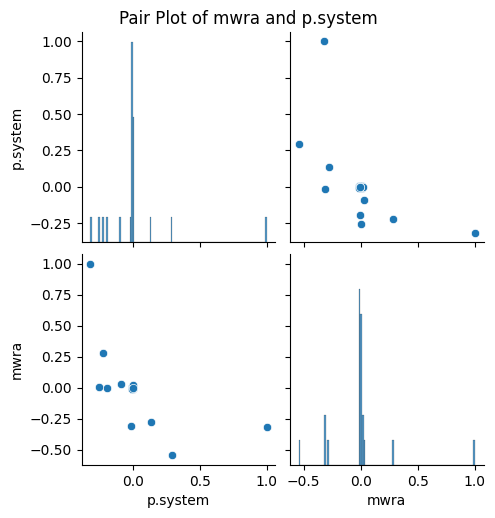

In [44]:
# Regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x="p.system", y="mwra", data=corr_processes)
plt.title('Regression Plot of mwra vs. p.system')
plt.xlabel('p.system')
plt.ylabel('mwra')
plt.grid(True)
plt.show()

# Pair plot
sns.pairplot(corr_processes[['p.system', 'mwra']])
plt.suptitle('Pair Plot of mwra and p.system', y=1.02)
plt.show()

##### Pair **(mwra, p.android.settings)**

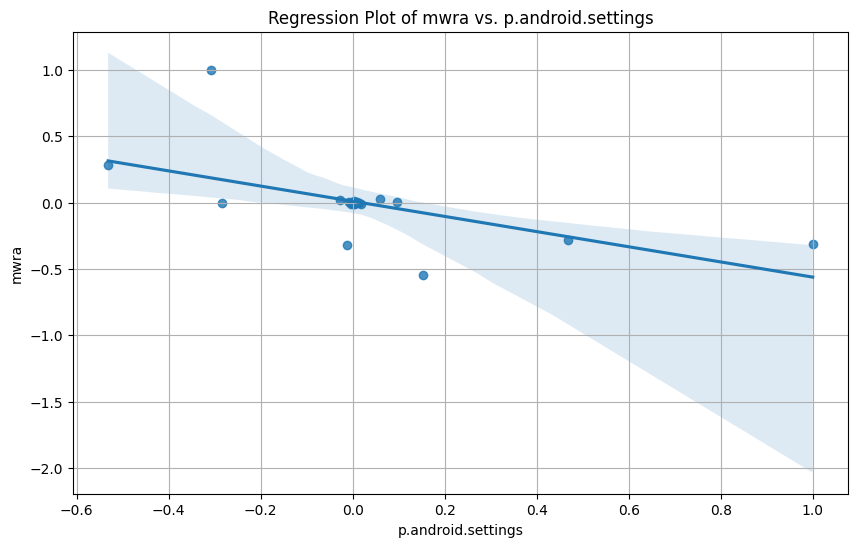

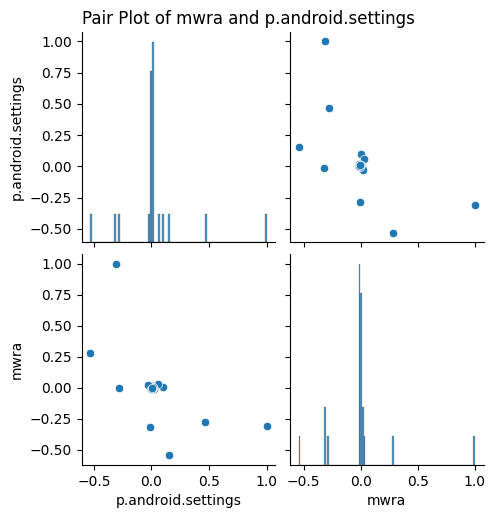

In [45]:
# Regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x="p.android.settings", y="mwra", data=corr_processes)
plt.title('Regression Plot of mwra vs. p.android.settings')
plt.xlabel('p.android.settings')
plt.ylabel('mwra')
plt.grid(True)
plt.show()

# Pair plot
sns.pairplot(corr_processes[['p.android.settings', 'mwra']])
plt.suptitle('Pair Plot of mwra and p.android.settings', y=1.02)
plt.show()

##### Pair **(mwra, p.android.gm)**

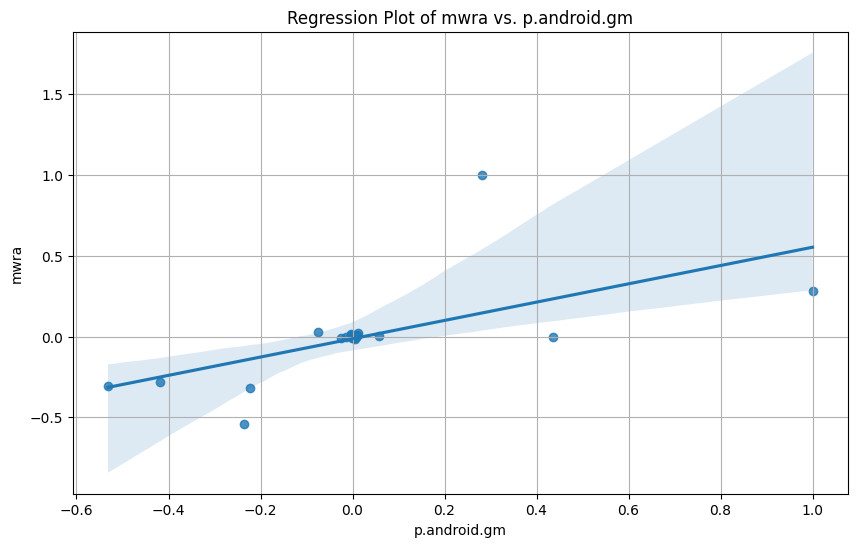

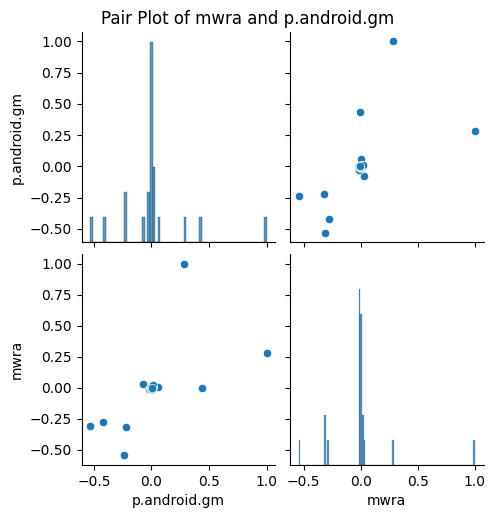

In [46]:
# Regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x="p.android.gm", y="mwra", data=corr_processes)
plt.title('Regression Plot of mwra vs. p.android.gm')
plt.xlabel('p.android.gm')
plt.ylabel('mwra')
plt.grid(True)
plt.show()

# Pair plot
sns.pairplot(corr_processes[['p.android.gm', 'mwra']])
plt.suptitle('Pair Plot of mwra and p.android.gm', y=1.02)
plt.show()

##### Pair **(mwra, p.android.externalstorage)**

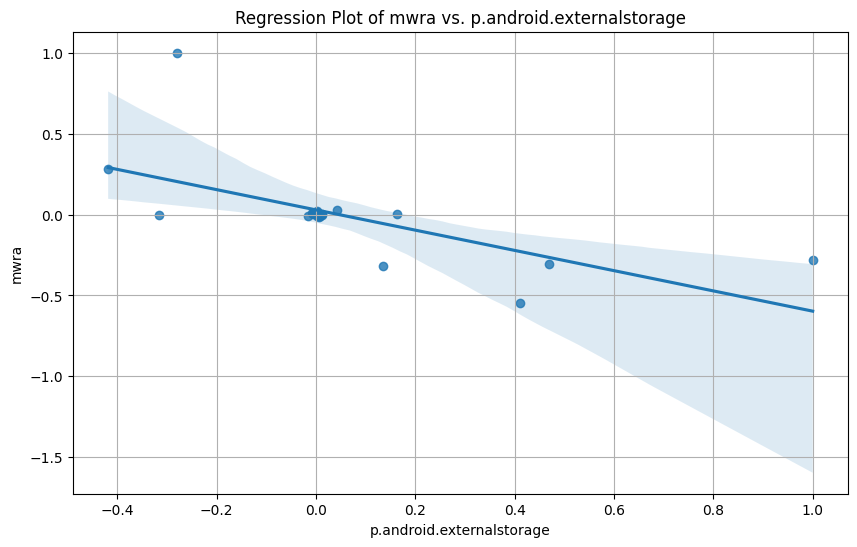

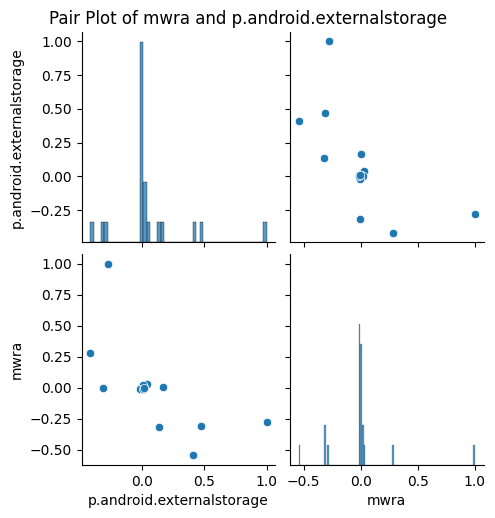

In [47]:
# Regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x="p.android.externalstorage", y="mwra", data=corr_processes)
plt.title('Regression Plot of mwra vs. p.android.externalstorage')
plt.xlabel('p.android.externalstorage')
plt.ylabel('mwra')
plt.grid(True)
plt.show()

# Pair plot
sns.pairplot(corr_processes[['p.android.externalstorage', 'mwra']])
plt.suptitle('Pair Plot of mwra and p.android.externalstorage', y=1.02)
plt.show()

### 1.2 Problem Identification, Data Integration and Cleaning

#### 1.2.1 Data Problems Identification and Solving

#### 1.2.2 Missing Values Solving

#### 1.2.3 Outlier Detection

### 1.3 Formulation and Statistical Verification of Hypotheses

#### 1.3.1 Hypotheses

##### 1.3.1.1 Hypothesis I

##### 1.3.1.2 Hypothesis II

#### 1.3.2 Statistical Power (Data Support) of the Tests Check